In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.patches as mpatches
import numpy as np
import pandas as pd
from scipy.stats import poisson, uniform, expon, pareto
from scipy.optimize import minimize
from tqdm import tqdm
from mdptoolbox import mdp, util
import itertools
from scipy.sparse import csr_matrix, lil_matrix
from matplotlib.patches import Patch
import math
import random
import sympy as sp
from sympy.printing.latex import print_latex

# Finding symmetric equilibria

In [753]:
n = 6
v1 = sp.Symbol('v_1', positive=True)
x1 = sp.Symbol('x_1', positive=True)
a  = sp.Symbol('alpha', positive=True)
cs = [sp.Symbol('c{}'.format(i), positive=True) for i in range(1,n+1)]
c1 = cs[0]
sumcs = (1/c1)**a
for i in range(1,n):
    sumcs += ((1/cs[i])**a)
x1 = (1/c1)**a / (sumcs)
u1 = (c1-v1)*x1

_a = 6/5
val = 30000
foc1 = sp.simplify(sp.diff(u1, c1).evalf(subs={a:_a, v1:1}))
evals = {c:val for c in cs}
foc1.evalf(subs=evals)

5.55555555601952e-6

In [689]:
# figure
n=2
n2Res = []
v1 = sp.Symbol('v_1', positive=True)
x1 = sp.Symbol('x_1', positive=True)
a  = sp.Symbol('alpha', positive=True)
cs = [sp.Symbol('c{}'.format(i), positive=True) for i in range(1,3)]
c1 = cs[0]
n2alphas = np.arange(2.1,6,0.1)
for _a in tqdm(n2alphas):
    sumcs = (1/c1)**a
    for i in range(1,n):
        sumcs += ((1/cs[i])**a)
    x1 = (1/c1)**a / (sumcs)
    u1 = (c1-v1)*x1
    foc1 = sp.simplify(sp.diff(u1, c1).evalf(subs={a:_a, v1:1}))
    for v in np.arange(1,25,0.01):
        evals = {c:v for c in cs}
        if foc1.evalf(subs=evals) < 0:
            n2Res.append(v)
            break
n2Res = np.asarray(n2Res)
n2Res.shape

100%|██████████| 39/39 [00:28<00:00,  1.37it/s]


(39,)

In [691]:
# figure
n=3
n3Res = []
v1 = sp.Symbol('v_1', positive=True)
x1 = sp.Symbol('x_1', positive=True)
a  = sp.Symbol('alpha', positive=True)
cs = [sp.Symbol('c{}'.format(i), positive=True) for i in range(1,n+1)]
c1 = cs[0]
n3alphas = np.arange(1.6,6,0.1)
for _a in tqdm(n3alphas):
    sumcs = (1/c1)**a
    for i in range(1,n):
        sumcs += ((1/cs[i])**a)
    x1 = (1/c1)**a / (sumcs)
    u1 = (c1-v1)*x1
    foc1 = sp.simplify(sp.diff(u1, c1).evalf(subs={a:_a, v1:1}))
    for v in np.arange(1,25,0.01):
        evals = {c:v for c in cs}
        if foc1.evalf(subs=evals) < 0:
            n3Res.append(v)
            break
n3Res = np.asarray(n3Res)
n3Res.shape

100%|██████████| 44/44 [00:32<00:00,  1.34it/s]


(44,)

In [701]:
# figure
n=4
n4Res = []
v1 = sp.Symbol('v_1', positive=True)
x1 = sp.Symbol('x_1', positive=True)
a  = sp.Symbol('alpha', positive=True)
cs = [sp.Symbol('c{}'.format(i), positive=True) for i in range(1,n+1)]
c1 = cs[0]
n4alphas = np.arange(4/3+0.1,6,0.1)
for _a in tqdm(n4alphas):
    sumcs = (1/c1)**a
    for i in range(1,n):
        sumcs += ((1/cs[i])**a)
    x1 = (1/c1)**a / (sumcs)
    u1 = (c1-v1)*x1
    foc1 = sp.simplify(sp.diff(u1, c1).evalf(subs={a:_a, v1:1}))
    for v in np.arange(1,25,0.01):
        evals = {c:v for c in cs}
        if foc1.evalf(subs=evals) < 0:
            n4Res.append(v)
            break
n4Res = np.asarray(n4Res)
n4Res.shape

100%|██████████| 46/46 [00:52<00:00,  1.14s/it]


(46,)

In [697]:
# figure
n=5
n5Res = []
v1 = sp.Symbol('v_1', positive=True)
x1 = sp.Symbol('x_1', positive=True)
a  = sp.Symbol('alpha', positive=True)
cs = [sp.Symbol('c{}'.format(i), positive=True) for i in range(1,n+1)]
c1 = cs[0]
n5alphas = np.arange(1.35,6,0.1)
for _a in tqdm(n5alphas):
    sumcs = (1/c1)**a
    for i in range(1,n):
        sumcs += ((1/cs[i])**a)
    x1 = (1/c1)**a / (sumcs)
    u1 = (c1-v1)*x1
    foc1 = sp.simplify(sp.diff(u1, c1).evalf(subs={a:_a, v1:1}))
    for v in np.arange(1,25,0.01):
        evals = {c:v for c in cs}
        if foc1.evalf(subs=evals) < 0:
            n5Res.append(v)
            break
n5Res = np.asarray(n5Res)
n5Res.shape

100%|██████████| 47/47 [01:24<00:00,  1.79s/it]


(47,)

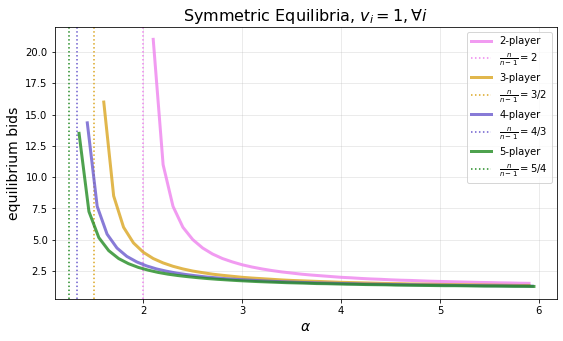

In [707]:
f, ax = plt.subplots(figsize=(9,5))
ax.plot(n2alphas, n2Res, color='violet', linewidth=3, alpha=0.8, label='2-player')
ax.axvline(2, color='violet', alpha=1, linestyle='dotted',label=r'$\frac{n}{n-1}=2$')
ax.plot(n3alphas, n3Res, color='goldenrod', linewidth=3, alpha=0.8, label='3-player')
ax.axvline(3/2, color='goldenrod', alpha=1, linestyle='dotted',label=r'$\frac{n}{n-1}=3/2$')
ax.plot(n4alphas, n4Res, color='slateblue', linewidth=3, alpha=0.8, label='4-player')
ax.axvline(4/3, color='slateblue', alpha=1, linestyle='dotted',label=r'$\frac{n}{n-1}=4/3$')
ax.plot(n5alphas, n5Res, color='forestgreen', linewidth=3, alpha=0.8, label='5-player')
ax.axvline(5/4, color='forestgreen', alpha=1, linestyle='dotted',label=r'$\frac{n}{n-1}=5/4$')

ax.set_title(r'Symmetric Equilibria, $v_i=1, \forall i$', size=16)
ax.set_xlabel(r'$\alpha$', size=14)
ax.set_ylabel(r'equilibrium bids', size=14)
ax.grid(alpha=0.3)

ax.legend()
plt.savefig('out.png', dpi=400, bbox_inches='tight', facecolor='white')
plt.show()

# best response

## N2A4

In [401]:
# do it at a place where we know the symmetric equilibrium exists

# true values
v1, v2 = 1, 1

# init conditions
curr1, curr2 = 1, 1
a = 4

# symbols
c1 = sp.Symbol('c1', positive=True)
c2 = sp.Symbol('c2', positive=True)

p1Bids11, p2Bids11 = [curr1], [curr2]
turn = 0
for turn in tqdm(range(30)):
    if turn % 2 == 0:
        x1 = 1/(c1**a) / (1/(c1**a) + 1/(c2**a))
        u1 = (c1-v1)*x1
        partial = sp.diff(u1, c1)
        best = sp.Eq(partial, 0).evalf(subs={c2:curr2})
        sol = sp.solve(best)[0]
        curr1 = sol
        p1Bids11.append(curr1)
    else:
        x2 = 1/(c2**a) / (1/(c1**a) + 1/(c2**a))
        u2 = (c2-v2)*x2
        partial = sp.diff(u2, c2)
        best = sp.Eq(partial, 0).evalf(subs={c1:curr1})
        sol = sp.solve(best)[0]
        curr2 = sol
        p2Bids11.append(curr2)

100%|██████████| 30/30 [00:14<00:00,  2.04it/s]


In [419]:
# do it at a place where we know the symmetric equilibrium exists

# true values
v1, v2 = 1, 2

# init conditions
curr1, curr2 = 1, 1
a = 4

# symbols
c1 = sp.Symbol('c1', positive=True)
c2 = sp.Symbol('c2', positive=True)

p1Bids12, p2Bids12 = [curr1], [curr2]
turn = 0
for turn in tqdm(range(30)):
    if turn % 2 == 0:
        x1 = 1/(c1**a) / (1/(c1**a) + 1/(c2**a))
        u1 = (c1-v1)*x1
        partial = sp.diff(u1, c1)
        best = sp.Eq(partial, 0).evalf(subs={c2:curr2})
        sol = sp.solve(best)[0]
        curr1 = sol
        p1Bids12.append(curr1)
    else:
        x2 = 1/(c2**a) / (1/(c1**a) + 1/(c2**a))
        u2 = (c2-v2)*x2
        partial = sp.diff(u2, c2)
        best = sp.Eq(partial, 0).evalf(subs={c1:curr1})
        sol = sp.solve(best)[0]
        curr2 = sol
        p2Bids12.append(curr2)

100%|██████████| 30/30 [00:15<00:00,  1.94it/s]


In [420]:
# do it at a place where we know the symmetric equilibrium exists

# true values
v1, v2 = 1, 8

# init conditions
curr1, curr2 = 1, 1
a = 4

# symbols
c1 = sp.Symbol('c1', positive=True)
c2 = sp.Symbol('c2', positive=True)

p1Bids18, p2Bids18 = [curr1], [curr2]
turn = 0
for turn in tqdm(range(30)):
    if turn % 2 == 0:
        x1 = 1/(c1**a) / (1/(c1**a) + 1/(c2**a))
        u1 = (c1-v1)*x1
        partial = sp.diff(u1, c1)
        best = sp.Eq(partial, 0).evalf(subs={c2:curr2})
        sol = sp.solve(best)[0]
        curr1 = sol
        p1Bids18.append(curr1)
    else:
        x2 = 1/(c2**a) / (1/(c1**a) + 1/(c2**a))
        u2 = (c2-v2)*x2
        partial = sp.diff(u2, c2)
        best = sp.Eq(partial, 0).evalf(subs={c1:curr1})
        sol = sp.solve(best)[0]
        curr2 = sol
        p2Bids18.append(curr2)

100%|██████████| 30/30 [00:15<00:00,  1.92it/s]


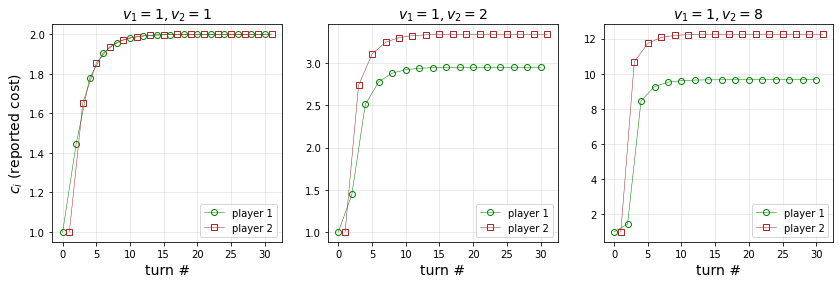

In [431]:
f, axarr = plt.subplots(ncols=3, figsize=(14,4))


axarr[0].plot(np.arange(0,31,2), p1Bids11, marker='o', fillstyle='none',
              linewidth=0.5, color='green', label='player 1')
axarr[0].plot(np.arange(1,32,2), p2Bids11, marker='s', fillstyle='none', 
              linewidth=0.5, color='brown', label='player 2')

axarr[1].plot(np.arange(0,31,2), p1Bids12, marker='o', fillstyle='none',
              linewidth=0.5, color='green', label='player 1')
axarr[1].plot(np.arange(1,32,2), p2Bids12, marker='s', fillstyle='none', 
              linewidth=0.5, color='brown', label='player 2')

axarr[2].plot(np.arange(0,31,2), p1Bids18, marker='o', fillstyle='none',
              linewidth=0.5, color='green', label='player 1')
axarr[2].plot(np.arange(1,32,2), p2Bids18, marker='s', fillstyle='none', 
              linewidth=0.5, color='brown', label='player 2')

axarr[0].set_title(r'$v_1=1,v_2=1$', size=14)
axarr[1].set_title(r'$v_1=1,v_2=2$', size=14)
axarr[2].set_title(r'$v_1=1,v_2=8$', size=14)
axarr[0].set_ylabel(r'$c_i$ (reported cost)', size=14)
for ax in axarr:
    ax.set_xlabel(r'turn #', size=14)
    ax.grid(alpha=0.3)
    ax.legend()

plt.savefig('out.png', dpi=400, bbox_inches='tight', facecolor='white')
plt.show()

## N2A3

In [443]:
# do it at a place where we know the symmetric equilibrium exists

# true values
v1, v2 = 1, 1

# init conditions
curr1, curr2 = 1, 1
a = 3

# symbols
c1 = sp.Symbol('c1', positive=True)
c2 = sp.Symbol('c2', positive=True)

p1Bids11, p2Bids11 = [curr1], [curr2]
turn = 0
for turn in tqdm(range(30)):
    if turn % 2 == 0:
        x1 = 1/(c1**a) / (1/(c1**a) + 1/(c2**a))
        u1 = (c1-v1)*x1
        partial = sp.diff(u1, c1)
        best = sp.Eq(partial, 0).evalf(subs={c2:curr2})
        sol = sp.solve(best)[0]
        curr1 = sol
        p1Bids11.append(curr1)
    else:
        x2 = 1/(c2**a) / (1/(c1**a) + 1/(c2**a))
        u2 = (c2-v2)*x2
        partial = sp.diff(u2, c2)
        best = sp.Eq(partial, 0).evalf(subs={c1:curr1})
        sol = sp.solve(best)[0]
        curr2 = sol
        p2Bids11.append(curr2)

100%|██████████| 30/30 [00:09<00:00,  3.14it/s]


In [444]:
# do it at a place where we know the symmetric equilibrium exists

# true values
v1, v2 = 1, 2

# init conditions
curr1, curr2 = 1, 1
a = 3

# symbols
c1 = sp.Symbol('c1', positive=True)
c2 = sp.Symbol('c2', positive=True)

p1Bids12, p2Bids12 = [curr1], [curr2]
turn = 0
for turn in tqdm(range(30)):
    if turn % 2 == 0:
        x1 = 1/(c1**a) / (1/(c1**a) + 1/(c2**a))
        u1 = (c1-v1)*x1
        partial = sp.diff(u1, c1)
        best = sp.Eq(partial, 0).evalf(subs={c2:curr2})
        sol = sp.solve(best)[0]
        curr1 = sol
        p1Bids12.append(curr1)
    else:
        x2 = 1/(c2**a) / (1/(c1**a) + 1/(c2**a))
        u2 = (c2-v2)*x2
        partial = sp.diff(u2, c2)
        best = sp.Eq(partial, 0).evalf(subs={c1:curr1})
        sol = sp.solve(best)[0]
        curr2 = sol
        p2Bids12.append(curr2)

100%|██████████| 30/30 [00:08<00:00,  3.34it/s]


In [445]:
# do it at a place where we know the symmetric equilibrium exists

# true values
v1, v2 = 1, 8

# init conditions
curr1, curr2 = 1, 1
a = 3

# symbols
c1 = sp.Symbol('c1', positive=True)
c2 = sp.Symbol('c2', positive=True)

p1Bids18, p2Bids18 = [curr1], [curr2]
turn = 0
for turn in tqdm(range(30)):
    if turn % 2 == 0:
        x1 = 1/(c1**a) / (1/(c1**a) + 1/(c2**a))
        u1 = (c1-v1)*x1
        partial = sp.diff(u1, c1)
        best = sp.Eq(partial, 0).evalf(subs={c2:curr2})
        sol = sp.solve(best)[0]
        curr1 = sol
        p1Bids18.append(curr1)
    else:
        x2 = 1/(c2**a) / (1/(c1**a) + 1/(c2**a))
        u2 = (c2-v2)*x2
        partial = sp.diff(u2, c2)
        best = sp.Eq(partial, 0).evalf(subs={c1:curr1})
        sol = sp.solve(best)[0]
        curr2 = sol
        p2Bids18.append(curr2)

100%|██████████| 30/30 [00:09<00:00,  3.28it/s]


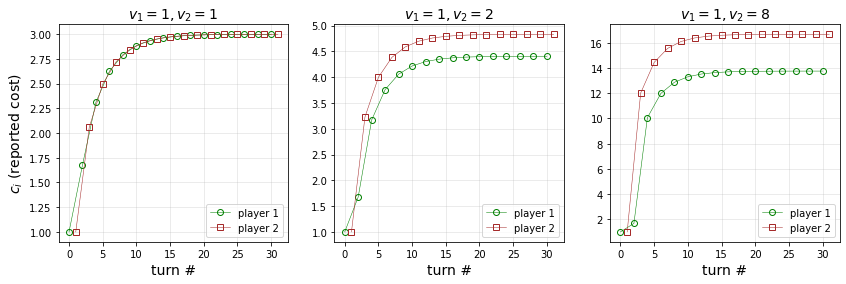

In [446]:
f, axarr = plt.subplots(ncols=3, figsize=(14,4))


axarr[0].plot(np.arange(0,31,2), p1Bids11, marker='o', fillstyle='none',
              linewidth=0.5, color='green', label='player 1')
axarr[0].plot(np.arange(1,32,2), p2Bids11, marker='s', fillstyle='none', 
              linewidth=0.5, color='brown', label='player 2')

axarr[1].plot(np.arange(0,31,2), p1Bids12, marker='o', fillstyle='none',
              linewidth=0.5, color='green', label='player 1')
axarr[1].plot(np.arange(1,32,2), p2Bids12, marker='s', fillstyle='none', 
              linewidth=0.5, color='brown', label='player 2')

axarr[2].plot(np.arange(0,31,2), p1Bids18, marker='o', fillstyle='none',
              linewidth=0.5, color='green', label='player 1')
axarr[2].plot(np.arange(1,32,2), p2Bids18, marker='s', fillstyle='none', 
              linewidth=0.5, color='brown', label='player 2')

axarr[0].set_title(r'$v_1=1,v_2=1$', size=14)
axarr[1].set_title(r'$v_1=1,v_2=2$', size=14)
axarr[2].set_title(r'$v_1=1,v_2=8$', size=14)
axarr[0].set_ylabel(r'$c_i$ (reported cost)', size=14)
for ax in axarr:
    ax.set_xlabel(r'turn #', size=14)
    ax.grid(alpha=0.3)
    ax.legend()

plt.savefig('out.png', dpi=400, bbox_inches='tight', facecolor='white')
plt.show()

## N2A2.1

In [757]:
turnCount = 200

In [762]:
# do it at a place where we know the symmetric equilibrium exists

# true values
v1, v2 = 1, 1

# init conditions
curr1, curr2 = 1.1, 1.1
a = 2.01

# symbols
c1 = sp.Symbol('c1', positive=True)
c2 = sp.Symbol('c2', positive=True)

p1Bids11, p2Bids11 = [curr1], [curr2]
turn = 0
for turn in tqdm(range(turnCount)):
    if turn % 2 == 0:
        x1 = 1/(c1**a) / (1/(c1**a) + 1/(c2**a))
        u1 = (c1-v1)*x1
        func1 = sp.lambdify([c1], -u1.evalf(subs={c2:curr2}))
        bounds = ((0, 1000),)
        sol = minimize(func1, (1.1), method='SLSQP', bounds=bounds).x[0]
        curr1 = sol
        p1Bids11.append(curr1)
    else:
        x2 = 1/(c2**a) / (1/(c1**a) + 1/(c2**a))
        u2 = (c2-v2)*x2
        func2 = sp.lambdify([c2], -u2.evalf(subs={c1:curr1}))
        bounds = ((0, 1000),)
        sol = minimize(func2, (1.1), method='SLSQP', bounds=bounds).x[0]
        curr2 = sol
        p2Bids11.append(curr2)

100%|██████████| 200/200 [00:01<00:00, 145.07it/s]


In [763]:
# do it at a place where we know the symmetric equilibrium exists

# true values
v1, v2 = 1, 2

# init conditions
curr1, curr2 = 1, 1
a = 2.01

# symbols
c1 = sp.Symbol('c1', positive=True)
c2 = sp.Symbol('c2', positive=True)

p1Bids12, p2Bids12 = [curr1], [curr2]
turn = 0
for turn in tqdm(range(turnCount)):
    if turn % 2 == 0:
        x1 = 1/(c1**a) / (1/(c1**a) + 1/(c2**a))
        u1 = (c1-v1)*x1
        func1 = sp.lambdify([c1], -u1.evalf(subs={c2:curr2}))
        bounds = ((0, 1000),)
        sol = minimize(func1, (1.1), method='SLSQP', bounds=bounds).x[0]
        curr1 = sol
        p1Bids12.append(curr1)
    else:
        x2 = 1/(c2**a) / (1/(c1**a) + 1/(c2**a))
        u2 = (c2-v2)*x2
        func2 = sp.lambdify([c2], -u2.evalf(subs={c1:curr1}))
        bounds = ((0, 1000),)
        sol = minimize(func2, (1.1), method='SLSQP', bounds=bounds).x[0]
        curr2 = sol
        p2Bids12.append(curr2)

100%|██████████| 200/200 [00:01<00:00, 104.89it/s]


In [764]:
# do it at a place where we know the symmetric equilibrium exists

# true values
v1, v2 = 1, 8

# init conditions
curr1, curr2 = 1, 1
a = 2.01

# symbols
c1 = sp.Symbol('c1', positive=True)
c2 = sp.Symbol('c2', positive=True)

p1Bids18, p2Bids18 = [curr1], [curr2]
turn = 0
for turn in tqdm(range(turnCount)):
    if turn % 2 == 0:
        x1 = 1/(c1**a) / (1/(c1**a) + 1/(c2**a))
        u1 = (c1-v1)*x1
        func1 = sp.lambdify([c1], -u1.evalf(subs={c2:curr2}))
        bounds = ((0, 1000),)
        sol = minimize(func1, (1.1), method='SLSQP', bounds=bounds).x[0]
        curr1 = sol
        p1Bids18.append(curr1)
    else:
        x2 = 1/(c2**a) / (1/(c1**a) + 1/(c2**a))
        u2 = (c2-v2)*x2
        func2 = sp.lambdify([c2], -u2.evalf(subs={c1:curr1}))
        bounds = ((0, 1000),)
        sol = minimize(func2, (1.1), method='SLSQP', bounds=bounds).x[0]
        curr2 = sol
        p2Bids18.append(curr2)

100%|██████████| 200/200 [00:01<00:00, 131.77it/s]


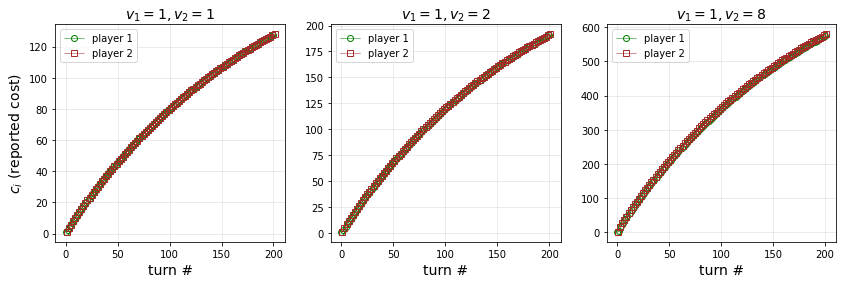

In [765]:
f, axarr = plt.subplots(ncols=3, figsize=(14,4))


axarr[0].plot(np.arange(0,turnCount+1,2), p1Bids11, marker='o', fillstyle='none',
              linewidth=0.5, color='green', label='player 1')
axarr[0].plot(np.arange(1,turnCount+2,2), p2Bids11, marker='s', fillstyle='none', 
              linewidth=0.5, color='brown', label='player 2')

axarr[1].plot(np.arange(0,turnCount+1,2), p1Bids12, marker='o', fillstyle='none',
              linewidth=0.5, color='green', label='player 1')
axarr[1].plot(np.arange(1,turnCount+2,2), p2Bids12, marker='s', fillstyle='none', 
              linewidth=0.5, color='brown', label='player 2')

axarr[2].plot(np.arange(0,turnCount+1,2), p1Bids18, marker='o', fillstyle='none',
              linewidth=0.5, color='green', label='player 1')
axarr[2].plot(np.arange(1,turnCount+2,2), p2Bids18, marker='s', fillstyle='none', 
              linewidth=0.5, color='brown', label='player 2')

axarr[0].set_title(r'$v_1=1,v_2=1$', size=14)
axarr[1].set_title(r'$v_1=1,v_2=2$', size=14)
axarr[2].set_title(r'$v_1=1,v_2=8$', size=14)
axarr[0].set_ylabel(r'$c_i$ (reported cost)', size=14)
for ax in axarr:
    ax.set_xlabel(r'turn #', size=14)
    ax.grid(alpha=0.3)
    ax.legend()

plt.savefig('out.png', dpi=400, bbox_inches='tight', facecolor='white')
plt.show()

## N2A2.01

In [754]:
turnCount = 2000

In [755]:
# do it at a place where we know the symmetric equilibrium exists

# true values
v1, v2 = 1, 1

# init conditions
curr1, curr2 = 1.1, 1.1
a = 2.0

# symbols
c1 = sp.Symbol('c1', positive=True)
c2 = sp.Symbol('c2', positive=True)

p1Bids11, p2Bids11 = [curr1], [curr2]
turn = 0
for turn in tqdm(range(turnCount)):
    if turn % 2 == 0:
        x1 = 1/(c1**a) / (1/(c1**a) + 1/(c2**a))
        u1 = (c1-v1)*x1
        func1 = sp.lambdify([c1], -u1.evalf(subs={c2:curr2}))
        bounds = ((0, 1000),)
        sol = minimize(func1, (1.1), method='SLSQP', bounds=bounds).x[0]
        curr1 = sol
        p1Bids11.append(curr1)
    else:
        x2 = 1/(c2**a) / (1/(c1**a) + 1/(c2**a))
        u2 = (c2-v2)*x2
        func2 = sp.lambdify([c2], -u2.evalf(subs={c1:curr1}))
        bounds = ((0, 1000),)
        sol = minimize(func2, (1.1), method='SLSQP', bounds=bounds).x[0]
        curr2 = sol
        p2Bids11.append(curr2)

 80%|████████  | 1609/2000 [00:10<00:02, 148.13it/s]


KeyboardInterrupt: 

In [724]:
# do it at a place where we know the symmetric equilibrium exists

# true values
v1, v2 = 1, 2

# init conditions
curr1, curr2 = 1, 1
a = 2.01

# symbols
c1 = sp.Symbol('c1', positive=True)
c2 = sp.Symbol('c2', positive=True)

p1Bids12, p2Bids12 = [curr1], [curr2]
turn = 0
for turn in tqdm(range(turnCount)):
    if turn % 2 == 0:
        x1 = 1/(c1**a) / (1/(c1**a) + 1/(c2**a))
        u1 = (c1-v1)*x1
        func1 = sp.lambdify([c1], -u1.evalf(subs={c2:curr2}))
        bounds = ((0, 1000),)
        sol = minimize(func1, (1.1), method='SLSQP', bounds=bounds).x[0]
        curr1 = sol
        p1Bids12.append(curr1)
    else:
        x2 = 1/(c2**a) / (1/(c1**a) + 1/(c2**a))
        u2 = (c2-v2)*x2
        func2 = sp.lambdify([c2], -u2.evalf(subs={c1:curr1}))
        bounds = ((0, 1000),)
        sol = minimize(func2, (1.1), method='SLSQP', bounds=bounds).x[0]
        curr2 = sol
        p2Bids12.append(curr2)

100%|██████████| 2000/2000 [00:11<00:00, 175.64it/s]


In [725]:
# do it at a place where we know the symmetric equilibrium exists

# true values
v1, v2 = 1, 8

# init conditions
curr1, curr2 = 1, 1
a = 2.01

# symbols
c1 = sp.Symbol('c1', positive=True)
c2 = sp.Symbol('c2', positive=True)

p1Bids18, p2Bids18 = [curr1], [curr2]
turn = 0
for turn in tqdm(range(turnCount)):
    if turn % 2 == 0:
        x1 = 1/(c1**a) / (1/(c1**a) + 1/(c2**a))
        u1 = (c1-v1)*x1
        func1 = sp.lambdify([c1], -u1.evalf(subs={c2:curr2}))
        bounds = ((0, 1000),)
        sol = minimize(func1, (1.1), method='SLSQP', bounds=bounds).x[0]
        curr1 = sol
        p1Bids18.append(curr1)
    else:
        x2 = 1/(c2**a) / (1/(c1**a) + 1/(c2**a))
        u2 = (c2-v2)*x2
        func2 = sp.lambdify([c2], -u2.evalf(subs={c1:curr1}))
        bounds = ((0, 1000),)
        sol = minimize(func2, (1.1), method='SLSQP', bounds=bounds).x[0]
        curr2 = sol
        p2Bids18.append(curr2)

100%|██████████| 2000/2000 [00:11<00:00, 168.26it/s]


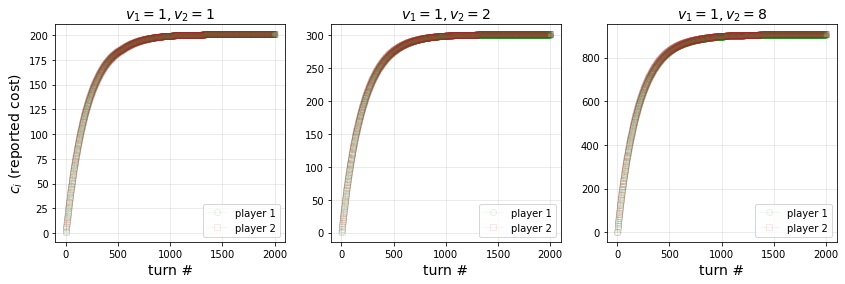

In [726]:
f, axarr = plt.subplots(ncols=3, figsize=(14,4))


axarr[0].plot(np.arange(0,turnCount+1,2), p1Bids11, marker='o', fillstyle='none',
              linewidth=0.5, color='green', label='player 1', alpha=0.1)
axarr[0].plot(np.arange(1,turnCount+2,2), p2Bids11, marker='s', fillstyle='none', 
              linewidth=0.5, color='brown', label='player 2', alpha=0.1)

axarr[1].plot(np.arange(0,turnCount+1,2), p1Bids12, marker='o', fillstyle='none',
              linewidth=0.5, color='green', label='player 1', alpha=0.1)
axarr[1].plot(np.arange(1,turnCount+2,2), p2Bids12, marker='s', fillstyle='none', 
              linewidth=0.5, color='brown', label='player 2', alpha=0.1)

axarr[2].plot(np.arange(0,turnCount+1,2), p1Bids18, marker='o', fillstyle='none',
              linewidth=0.5, color='green', label='player 1', alpha=0.1)
axarr[2].plot(np.arange(1,turnCount+2,2), p2Bids18, marker='s', fillstyle='none', 
              linewidth=0.5, color='brown', label='player 2', alpha=0.1)

axarr[0].set_title(r'$v_1=1,v_2=1$', size=14)
axarr[1].set_title(r'$v_1=1,v_2=2$', size=14)
axarr[2].set_title(r'$v_1=1,v_2=8$', size=14)
axarr[0].set_ylabel(r'$c_i$ (reported cost)', size=14)
for ax in axarr:
    ax.set_xlabel(r'turn #', size=14)
    ax.grid(alpha=0.3)
    ax.legend()

plt.savefig('out.png', dpi=400, bbox_inches='tight', facecolor='white')
plt.show()

## N3A2

In [580]:
turnCount = 50

In [581]:
# do it at a place where we know the symmetric equilibrium exists

# true values
v1, v2, v3 = 1, 1, 1

# init conditions
curr1, curr2, curr3 = 1.1, 1.1, 1.1
a = 2.0

# symbols
c1 = sp.Symbol('c1', positive=True)
c2 = sp.Symbol('c2', positive=True)
c3 = sp.Symbol('c3', positive=True)

p1Bids111, p2Bids111, p3Bids111 = [curr1], [curr2], [curr3]
turn = 0
for turn in tqdm(range(turnCount)):
    if turn % 3 == 0:
        x1 = 1/(c1**a) / (1/(c1**a) + 1/(c2**a) + 1/(c3**a))
        u1 = (c1-v1)*x1
        func1 = sp.lambdify([c1], -u1.evalf(subs={c2:curr2, c3: curr3}))
        bounds = ((0, 1000),)
        sol = minimize(func1, (1.1), method='SLSQP', bounds=bounds).x[0]
        curr1 = sol
        p1Bids111.append(curr1)
    elif turn % 3 == 1:
        x2 = 1/(c2**a) / (1/(c1**a) + 1/(c2**a) + 1/(c3**a))
        u2 = (c2-v2)*x2
        func2 = sp.lambdify([c2], -u2.evalf(subs={c1:curr1, c3: curr3}))
        bounds = ((0, 1000),)
        sol = minimize(func2, (1.1), method='SLSQP', bounds=bounds).x[0]
        curr2 = sol
        p2Bids111.append(curr2)
    else:
        x3 = 1/(c3**a) / (1/(c1**a) + 1/(c2**a) + 1/(c3**a))
        u3 = (c3-v3)*x3
        func3 = sp.lambdify([c3], -u3.evalf(subs={c1:curr1, c2: curr2}))
        bounds = ((0, 1000),)
        sol = minimize(func3, (1.1), method='SLSQP', bounds=bounds).x[0]
        curr3 = sol
        p3Bids111.append(curr3)

100%|██████████| 50/50 [00:00<00:00, 152.10it/s]


In [582]:
# do it at a place where we know the symmetric equilibrium exists

# true values
v1, v2, v3 = 1, 2, 3

# init conditions
curr1, curr2, curr3 = 1.1, 1.1, 1.1
a = 2.0

# symbols
c1 = sp.Symbol('c1', positive=True)
c2 = sp.Symbol('c2', positive=True)
c3 = sp.Symbol('c3', positive=True)

p1Bids123, p2Bids123, p3Bids123 = [curr1], [curr2], [curr3]
turn = 0
for turn in tqdm(range(turnCount)):
    if turn % 3 == 0:
        x1 = 1/(c1**a) / (1/(c1**a) + 1/(c2**a) + 1/(c3**a))
        u1 = (c1-v1)*x1
        func1 = sp.lambdify([c1], -u1.evalf(subs={c2:curr2, c3: curr3}))
        bounds = ((0, 1000),)
        sol = minimize(func1, (1.1), method='SLSQP', bounds=bounds).x[0]
        curr1 = sol
        p1Bids123.append(curr1)
    elif turn % 3 == 1:
        x2 = 1/(c2**a) / (1/(c1**a) + 1/(c2**a) + 1/(c3**a))
        u2 = (c2-v2)*x2
        func2 = sp.lambdify([c2], -u2.evalf(subs={c1:curr1, c3: curr3}))
        bounds = ((0, 1000),)
        sol = minimize(func2, (1.1), method='SLSQP', bounds=bounds).x[0]
        curr2 = sol
        p2Bids123.append(curr2)
    else:
        x3 = 1/(c3**a) / (1/(c1**a) + 1/(c2**a) + 1/(c3**a))
        u3 = (c3-v3)*x3
        func3 = sp.lambdify([c3], -u3.evalf(subs={c1:curr1, c2: curr2}))
        bounds = ((0, 1000),)
        sol = minimize(func3, (1.1), method='SLSQP', bounds=bounds).x[0]
        curr3 = sol
        p3Bids123.append(curr3)

100%|██████████| 50/50 [00:00<00:00, 153.54it/s]


In [583]:
# do it at a place where we know the symmetric equilibrium exists

# true values
v1, v2, v3 = 1, 4, 16

# init conditions
curr1, curr2, curr3 = 1.1, 1.1, 1.1
a = 2.0

# symbols
c1 = sp.Symbol('c1', positive=True)
c2 = sp.Symbol('c2', positive=True)
c3 = sp.Symbol('c3', positive=True)

p1Bids1416, p2Bids1416, p3Bids1416 = [curr1], [curr2], [curr3]
turn = 0
for turn in tqdm(range(turnCount)):
    if turn % 3 == 0:
        x1 = 1/(c1**a) / (1/(c1**a) + 1/(c2**a) + 1/(c3**a))
        u1 = (c1-v1)*x1
        func1 = sp.lambdify([c1], -u1.evalf(subs={c2:curr2, c3: curr3}))
        bounds = ((0, 1000),)
        sol = minimize(func1, (1.1), method='SLSQP', bounds=bounds).x[0]
        curr1 = sol
        p1Bids1416.append(curr1)
    elif turn % 3 == 1:
        x2 = 1/(c2**a) / (1/(c1**a) + 1/(c2**a) + 1/(c3**a))
        u2 = (c2-v2)*x2
        func2 = sp.lambdify([c2], -u2.evalf(subs={c1:curr1, c3: curr3}))
        bounds = ((0, 1000),)
        sol = minimize(func2, (1.1), method='SLSQP', bounds=bounds).x[0]
        curr2 = sol
        p2Bids1416.append(curr2)
    else:
        x3 = 1/(c3**a) / (1/(c1**a) + 1/(c2**a) + 1/(c3**a))
        u3 = (c3-v3)*x3
        func3 = sp.lambdify([c3], -u3.evalf(subs={c1:curr1, c2: curr2}))
        bounds = ((0, 1000),)
        sol = minimize(func3, (1.1), method='SLSQP', bounds=bounds).x[0]
        curr3 = sol
        p3Bids1416.append(curr3)

100%|██████████| 50/50 [00:00<00:00, 127.08it/s]


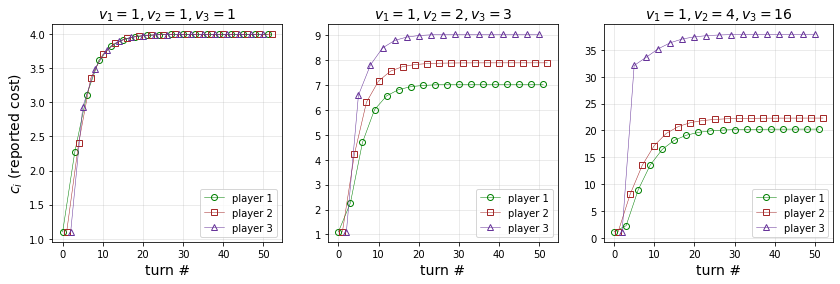

In [591]:
f, axarr = plt.subplots(ncols=3, figsize=(14,4))


axarr[0].plot(np.arange(0,turnCount+3,3), p1Bids111, marker='o', fillstyle='none',
              linewidth=0.5, color='green', label='player 1', alpha=1)
axarr[0].plot(np.arange(1,turnCount+3,3), p2Bids111, marker='s', fillstyle='none', 
              linewidth=0.5, color='brown', label='player 2', alpha=1)
axarr[0].plot(np.arange(2,turnCount+3,3), p3Bids111, marker='^', fillstyle='none', 
              linewidth=0.5, color='rebeccapurple', label='player 3', alpha=1)

axarr[1].plot(np.arange(0,turnCount+3,3), p1Bids123, marker='o', fillstyle='none',
              linewidth=0.5, color='green', label='player 1', alpha=1)
axarr[1].plot(np.arange(1,turnCount+3,3), p2Bids123, marker='s', fillstyle='none', 
              linewidth=0.5, color='brown', label='player 2', alpha=1)
axarr[1].plot(np.arange(2,turnCount+3,3), p3Bids123, marker='^', fillstyle='none', 
              linewidth=0.5, color='rebeccapurple', label='player 3', alpha=1)

axarr[2].plot(np.arange(0,turnCount+3,3), p1Bids1416, marker='o', fillstyle='none',
              linewidth=0.5, color='green', label='player 1', alpha=1)
axarr[2].plot(np.arange(1,turnCount+3,3), p2Bids1416, marker='s', fillstyle='none', 
              linewidth=0.5, color='brown', label='player 2', alpha=1)
axarr[2].plot(np.arange(2,turnCount+3,3), p3Bids1416, marker='^', fillstyle='none', 
              linewidth=0.5, color='rebeccapurple', label='player 3', alpha=1)


axarr[0].set_title(r'$v_1=1,v_2=1,v_3=1$', size=14)
axarr[1].set_title(r'$v_1=1,v_2=2,v_3=3$', size=14)
axarr[2].set_title(r'$v_1=1,v_2=4,v_3=16$', size=14)
axarr[0].set_ylabel(r'$c_i$ (reported cost)', size=14)
for ax in axarr:
    ax.set_xlabel(r'turn #', size=14)
    ax.grid(alpha=0.3)
    ax.legend()

plt.savefig('out.png', dpi=400, bbox_inches='tight', facecolor='white')
plt.show()

## n3a1.51

In [611]:
turnCount = 1000

In [612]:
# do it at a place where we know the symmetric equilibrium exists

# true values
v1, v2, v3 = 1, 1, 1

# init conditions
curr1, curr2, curr3 = 1.1, 1.1, 1.1
a = 1.51

# symbols
c1 = sp.Symbol('c1', positive=True)
c2 = sp.Symbol('c2', positive=True)
c3 = sp.Symbol('c3', positive=True)

p1Bids111, p2Bids111, p3Bids111 = [curr1], [curr2], [curr3]
turn = 0
for turn in tqdm(range(turnCount)):
    if turn % 3 == 0:
        x1 = 1/(c1**a) / (1/(c1**a) + 1/(c2**a) + 1/(c3**a))
        u1 = (c1-v1)*x1
        func1 = sp.lambdify([c1], -u1.evalf(subs={c2:curr2, c3: curr3}))
        bounds = ((0, 1000),)
        sol = minimize(func1, (1.1), method='SLSQP', bounds=bounds).x[0]
        curr1 = sol
        p1Bids111.append(curr1)
    elif turn % 3 == 1:
        x2 = 1/(c2**a) / (1/(c1**a) + 1/(c2**a) + 1/(c3**a))
        u2 = (c2-v2)*x2
        func2 = sp.lambdify([c2], -u2.evalf(subs={c1:curr1, c3: curr3}))
        bounds = ((0, 1000),)
        sol = minimize(func2, (1.1), method='SLSQP', bounds=bounds).x[0]
        curr2 = sol
        p2Bids111.append(curr2)
    else:
        x3 = 1/(c3**a) / (1/(c1**a) + 1/(c2**a) + 1/(c3**a))
        u3 = (c3-v3)*x3
        func3 = sp.lambdify([c3], -u3.evalf(subs={c1:curr1, c2: curr2}))
        bounds = ((0, 1000),)
        sol = minimize(func3, (1.1), method='SLSQP', bounds=bounds).x[0]
        curr3 = sol
        p3Bids111.append(curr3)

100%|██████████| 1000/1000 [00:07<00:00, 130.32it/s]


In [613]:
# do it at a place where we know the symmetric equilibrium exists

# true values
v1, v2, v3 = 1, 2, 3

# init conditions
curr1, curr2, curr3 = 1.1, 1.1, 1.1
a = 1.51

# symbols
c1 = sp.Symbol('c1', positive=True)
c2 = sp.Symbol('c2', positive=True)
c3 = sp.Symbol('c3', positive=True)

p1Bids123, p2Bids123, p3Bids123 = [curr1], [curr2], [curr3]
turn = 0
for turn in tqdm(range(turnCount)):
    if turn % 3 == 0:
        x1 = 1/(c1**a) / (1/(c1**a) + 1/(c2**a) + 1/(c3**a))
        u1 = (c1-v1)*x1
        func1 = sp.lambdify([c1], -u1.evalf(subs={c2:curr2, c3: curr3}))
        bounds = ((0, 1000),)
        sol = minimize(func1, (1.1), method='SLSQP', bounds=bounds).x[0]
        curr1 = sol
        p1Bids123.append(curr1)
    elif turn % 3 == 1:
        x2 = 1/(c2**a) / (1/(c1**a) + 1/(c2**a) + 1/(c3**a))
        u2 = (c2-v2)*x2
        func2 = sp.lambdify([c2], -u2.evalf(subs={c1:curr1, c3: curr3}))
        bounds = ((0, 1000),)
        sol = minimize(func2, (1.1), method='SLSQP', bounds=bounds).x[0]
        curr2 = sol
        p2Bids123.append(curr2)
    else:
        x3 = 1/(c3**a) / (1/(c1**a) + 1/(c2**a) + 1/(c3**a))
        u3 = (c3-v3)*x3
        func3 = sp.lambdify([c3], -u3.evalf(subs={c1:curr1, c2: curr2}))
        bounds = ((0, 1000),)
        sol = minimize(func3, (1.1), method='SLSQP', bounds=bounds).x[0]
        curr3 = sol
        p3Bids123.append(curr3)

100%|██████████| 1000/1000 [00:07<00:00, 131.50it/s]


In [614]:
# do it at a place where we know the symmetric equilibrium exists

# true values
v1, v2, v3 = 1, 4, 16

# init conditions
curr1, curr2, curr3 = 1.1, 1.1, 1.1
a = 1.51

# symbols
c1 = sp.Symbol('c1', positive=True)
c2 = sp.Symbol('c2', positive=True)
c3 = sp.Symbol('c3', positive=True)

p1Bids1416, p2Bids1416, p3Bids1416 = [curr1], [curr2], [curr3]
turn = 0
for turn in tqdm(range(turnCount)):
    if turn % 3 == 0:
        x1 = 1/(c1**a) / (1/(c1**a) + 1/(c2**a) + 1/(c3**a))
        u1 = (c1-v1)*x1
        func1 = sp.lambdify([c1], -u1.evalf(subs={c2:curr2, c3: curr3}))
        bounds = ((0, 10000),)
        sol = minimize(func1, (1.1), method='SLSQP', bounds=bounds).x[0]
        curr1 = sol
        p1Bids1416.append(curr1)
    elif turn % 3 == 1:
        x2 = 1/(c2**a) / (1/(c1**a) + 1/(c2**a) + 1/(c3**a))
        u2 = (c2-v2)*x2
        func2 = sp.lambdify([c2], -u2.evalf(subs={c1:curr1, c3: curr3}))
        bounds = ((0, 10000),)
        sol = minimize(func2, (1.1), method='SLSQP', bounds=bounds).x[0]
        curr2 = sol
        p2Bids1416.append(curr2)
    else:
        x3 = 1/(c3**a) / (1/(c1**a) + 1/(c2**a) + 1/(c3**a))
        u3 = (c3-v3)*x3
        func3 = sp.lambdify([c3], -u3.evalf(subs={c1:curr1, c2: curr2}))
        bounds = ((0, 10000),)
        sol = minimize(func3, (1.1), method='SLSQP', bounds=bounds).x[0]
        curr3 = sol
        p3Bids1416.append(curr3)

100%|██████████| 1000/1000 [00:07<00:00, 131.20it/s]


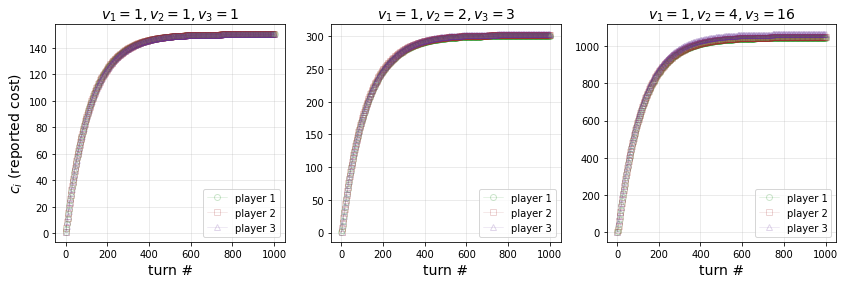

In [616]:
f, axarr = plt.subplots(ncols=3, figsize=(14,4))


axarr[0].plot(np.arange(0,turnCount+3,3), p1Bids111, marker='o', fillstyle='none',
              linewidth=0.5, color='green', label='player 1', alpha=0.2)
axarr[0].plot(np.arange(1,turnCount+3,3), p2Bids111, marker='s', fillstyle='none', 
              linewidth=0.5, color='brown', label='player 2', alpha=0.2)
axarr[0].plot(np.arange(2,turnCount+3,3), p3Bids111, marker='^', fillstyle='none', 
              linewidth=0.5, color='rebeccapurple', label='player 3', alpha=0.2)

axarr[1].plot(np.arange(0,turnCount+3,3), p1Bids123, marker='o', fillstyle='none',
              linewidth=0.5, color='green', label='player 1', alpha=0.2)
axarr[1].plot(np.arange(1,turnCount+3,3), p2Bids123, marker='s', fillstyle='none', 
              linewidth=0.5, color='brown', label='player 2', alpha=0.2)
axarr[1].plot(np.arange(2,turnCount+3,3), p3Bids123, marker='^', fillstyle='none', 
              linewidth=0.5, color='rebeccapurple', label='player 3', alpha=0.2)

axarr[2].plot(np.arange(0,turnCount+3,3), p1Bids1416, marker='o', fillstyle='none',
              linewidth=0.5, color='green', label='player 1', alpha=0.2)
axarr[2].plot(np.arange(1,turnCount+3,3), p2Bids1416, marker='s', fillstyle='none', 
              linewidth=0.5, color='brown', label='player 2', alpha=0.2)
axarr[2].plot(np.arange(2,turnCount+3,3), p3Bids1416, marker='^', fillstyle='none', 
              linewidth=0.5, color='rebeccapurple', label='player 3', alpha=0.2)


axarr[0].set_title(r'$v_1=1,v_2=1,v_3=1$', size=14)
axarr[1].set_title(r'$v_1=1,v_2=2,v_3=3$', size=14)
axarr[2].set_title(r'$v_1=1,v_2=4,v_3=16$', size=14)
axarr[0].set_ylabel(r'$c_i$ (reported cost)', size=14)
for ax in axarr:
    ax.set_xlabel(r'turn #', size=14)
    ax.grid(alpha=0.3)
    ax.legend()

plt.savefig('out.png', dpi=400, bbox_inches='tight', facecolor='white')
plt.show()

## N4A2

In [664]:
turnCount = 75

In [665]:
# do it at a place where we know the symmetric equilibrium exists

# true values
v1, v2, v3, v4 = 1, 1, 1, 1

# init conditions
curr1, curr2, curr3, curr4 = 1.1, 1.1, 1.1, 1.1
a = 1.5

# symbols
c1 = sp.Symbol('c1', positive=True)
c2 = sp.Symbol('c2', positive=True)
c3 = sp.Symbol('c3', positive=True)
c4 = sp.Symbol('c4', positive=True)

p1Bids1111, p2Bids1111, p3Bids1111, p4Bids1111 = [curr1], [curr2], [curr3], [curr4]
turn = 0
for turn in tqdm(range(turnCount)):
    if turn % 4 == 0:
        x1 = 1/(c1**a) / (1/(c1**a) + 1/(c2**a) + 1/(c3**a) + 1/(c4**a))
        u1 = (c1-v1)*x1
        func1 = sp.lambdify([c1], -u1.evalf(subs={c2:curr2, c3: curr3, c4: curr4}))
        bounds = ((0, 1000),)
        sol = minimize(func1, (1.1), method='SLSQP', bounds=bounds).x[0]
        curr1 = sol
        p1Bids1111.append(curr1)
    elif turn % 4 == 1:
        x2 = 1/(c2**a) / (1/(c1**a) + 1/(c2**a) + 1/(c3**a) + 1/(c4**a))
        u2 = (c2-v2)*x2
        func2 = sp.lambdify([c2], -u2.evalf(subs={c1:curr1, c3: curr3, c4: curr4}))
        bounds = ((0, 1000),)
        sol = minimize(func2, (1.1), method='SLSQP', bounds=bounds).x[0]
        curr2 = sol
        p2Bids1111.append(curr2)
    elif turn % 4 == 2:
        x3 = 1/(c3**a) / (1/(c1**a) + 1/(c2**a) + 1/(c3**a) + 1/(c4**a))
        u3 = (c3-v3)*x3
        func3 = sp.lambdify([c3], -u3.evalf(subs={c1:curr1, c2: curr2, c4: curr4}))
        bounds = ((0, 1000),)
        sol = minimize(func3, (1.1), method='SLSQP', bounds=bounds).x[0]
        curr3 = sol
        p3Bids1111.append(curr3)
    else:
        x4 = 1/(c4**a) / (1/(c1**a) + 1/(c2**a) + 1/(c3**a) + 1/(c4**a))
        u4 = (c4-v4)*x4
        func4 = sp.lambdify([c4], -u4.evalf(subs={c1:curr1, c2: curr2, c3: curr3}))
        bounds = ((0, 1000),)
        sol = minimize(func4, (1.1), method='SLSQP', bounds=bounds).x[0]
        curr4 = sol
        p4Bids1111.append(curr4)

100%|██████████| 75/75 [00:00<00:00, 113.10it/s]


In [666]:
# do it at a place where we know the symmetric equilibrium exists

# true values
v1, v2, v3, v4 = 1, 2, 3, 4

# init conditions
curr1, curr2, curr3, curr4 = 1.1, 1.1, 1.1, 1.1
a = 1.5

# symbols
c1 = sp.Symbol('c1', positive=True)
c2 = sp.Symbol('c2', positive=True)
c3 = sp.Symbol('c3', positive=True)
c4 = sp.Symbol('c4', positive=True)

p1Bids1234, p2Bids1234, p3Bids1234, p4Bids1234 = [curr1], [curr2], [curr3], [curr4]
turn = 0
for turn in tqdm(range(turnCount)):
    if turn % 4 == 0:
        x1 = 1/(c1**a) / (1/(c1**a) + 1/(c2**a) + 1/(c3**a) + 1/(c4**a))
        u1 = (c1-v1)*x1
        func1 = sp.lambdify([c1], -u1.evalf(subs={c2:curr2, c3: curr3, c4: curr4}))
        bounds = ((0, 1000),)
        sol = minimize(func1, (1.1), method='SLSQP', bounds=bounds).x[0]
        curr1 = sol
        p1Bids1234.append(curr1)
    elif turn % 4 == 1:
        x2 = 1/(c2**a) / (1/(c1**a) + 1/(c2**a) + 1/(c3**a) + 1/(c4**a))
        u2 = (c2-v2)*x2
        func2 = sp.lambdify([c2], -u2.evalf(subs={c1:curr1, c3: curr3, c4: curr4}))
        bounds = ((0, 1000),)
        sol = minimize(func2, (1.1), method='SLSQP', bounds=bounds).x[0]
        curr2 = sol
        p2Bids1234.append(curr2)
    elif turn % 4 == 2:
        x3 = 1/(c3**a) / (1/(c1**a) + 1/(c2**a) + 1/(c3**a) + 1/(c4**a))
        u3 = (c3-v3)*x3
        func3 = sp.lambdify([c3], -u3.evalf(subs={c1:curr1, c2: curr2, c4: curr4}))
        bounds = ((0, 1000),)
        sol = minimize(func3, (1.1), method='SLSQP', bounds=bounds).x[0]
        curr3 = sol
        p3Bids1234.append(curr3)
    else:
        x4 = 1/(c4**a) / (1/(c1**a) + 1/(c2**a) + 1/(c3**a) + 1/(c4**a))
        u4 = (c4-v4)*x4
        func4 = sp.lambdify([c4], -u4.evalf(subs={c1:curr1, c2: curr2, c3: curr3}))
        bounds = ((0, 1000),)
        sol = minimize(func4, (1.1), method='SLSQP', bounds=bounds).x[0]
        curr4 = sol
        p4Bids1234.append(curr4)

100%|██████████| 75/75 [00:00<00:00, 104.89it/s]


In [667]:
# do it at a place where we know the symmetric equilibrium exists

# true values
v1, v2, v3, v4 = 1, 2, 4, 8

# init conditions
curr1, curr2, curr3, curr4 = 1.1, 1.1, 1.1, 1.1
a = 1.5

# symbols
c1 = sp.Symbol('c1', positive=True)
c2 = sp.Symbol('c2', positive=True)
c3 = sp.Symbol('c3', positive=True)
c4 = sp.Symbol('c4', positive=True)

p1Bids1248, p2Bids1248, p3Bids1248, p4Bids1248 = [curr1], [curr2], [curr3], [curr4]
turn = 0
for turn in tqdm(range(turnCount)):
    if turn % 4 == 0:
        x1 = 1/(c1**a) / (1/(c1**a) + 1/(c2**a) + 1/(c3**a) + 1/(c4**a))
        u1 = (c1-v1)*x1
        func1 = sp.lambdify([c1], -u1.evalf(subs={c2:curr2, c3: curr3, c4: curr4}))
        bounds = ((0, 1000),)
        sol = minimize(func1, (1.1), method='SLSQP', bounds=bounds).x[0]
        curr1 = sol
        p1Bids1248.append(curr1)
    elif turn % 4 == 1:
        x2 = 1/(c2**a) / (1/(c1**a) + 1/(c2**a) + 1/(c3**a) + 1/(c4**a))
        u2 = (c2-v2)*x2
        func2 = sp.lambdify([c2], -u2.evalf(subs={c1:curr1, c3: curr3, c4: curr4}))
        bounds = ((0, 1000),)
        sol = minimize(func2, (1.1), method='SLSQP', bounds=bounds).x[0]
        curr2 = sol
        p2Bids1248.append(curr2)
    elif turn % 4 == 2:
        x3 = 1/(c3**a) / (1/(c1**a) + 1/(c2**a) + 1/(c3**a) + 1/(c4**a))
        u3 = (c3-v3)*x3
        func3 = sp.lambdify([c3], -u3.evalf(subs={c1:curr1, c2: curr2, c4: curr4}))
        bounds = ((0, 1000),)
        sol = minimize(func3, (1.1), method='SLSQP', bounds=bounds).x[0]
        curr3 = sol
        p3Bids1248.append(curr3)
    else:
        x4 = 1/(c4**a) / (1/(c1**a) + 1/(c2**a) + 1/(c3**a) + 1/(c4**a))
        u4 = (c4-v4)*x4
        func4 = sp.lambdify([c4], -u4.evalf(subs={c1:curr1, c2: curr2, c3: curr3}))
        bounds = ((0, 1000),)
        sol = minimize(func4, (1.1), method='SLSQP', bounds=bounds).x[0]
        curr4 = sol
        p4Bids1248.append(curr4)

100%|██████████| 75/75 [00:00<00:00, 117.27it/s]


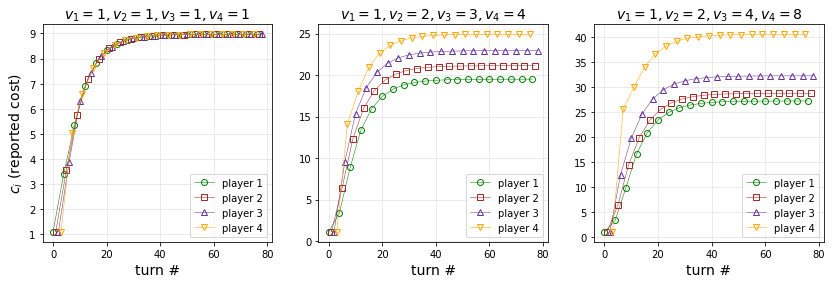

In [668]:
f, axarr = plt.subplots(ncols=3, figsize=(14,4))


axarr[0].plot(np.arange(0,turnCount+4,4), p1Bids1111, marker='o', fillstyle='none',
              linewidth=0.5, color='green', label='player 1', alpha=1)
axarr[0].plot(np.arange(1,turnCount+4,4), p2Bids1111, marker='s', fillstyle='none', 
              linewidth=0.5, color='brown', label='player 2', alpha=1)
axarr[0].plot(np.arange(2,turnCount+4,4), p3Bids1111, marker='^', fillstyle='none', 
              linewidth=0.5, color='rebeccapurple', label='player 3', alpha=1)
axarr[0].plot(np.arange(3,turnCount+4,4), p4Bids1111, marker='v', fillstyle='none', 
              linewidth=0.5, color='orange', label='player 4', alpha=1)

axarr[1].plot(np.arange(0,turnCount+4,4), p1Bids1234, marker='o', fillstyle='none',
              linewidth=0.5, color='green', label='player 1', alpha=1)
axarr[1].plot(np.arange(1,turnCount+4,4), p2Bids1234, marker='s', fillstyle='none', 
              linewidth=0.5, color='brown', label='player 2', alpha=1)
axarr[1].plot(np.arange(2,turnCount+4,4), p3Bids1234, marker='^', fillstyle='none', 
              linewidth=0.5, color='rebeccapurple', label='player 3', alpha=1)
axarr[1].plot(np.arange(3,turnCount+4,4), p4Bids1234, marker='v', fillstyle='none', 
              linewidth=0.5, color='orange', label='player 4', alpha=1)

axarr[2].plot(np.arange(0,turnCount+4,4), p1Bids1248, marker='o', fillstyle='none',
              linewidth=0.5, color='green', label='player 1', alpha=1)
axarr[2].plot(np.arange(1,turnCount+4,4), p2Bids1248, marker='s', fillstyle='none', 
              linewidth=0.5, color='brown', label='player 2', alpha=1)
axarr[2].plot(np.arange(2,turnCount+4,4), p3Bids1248, marker='^', fillstyle='none', 
              linewidth=0.5, color='rebeccapurple', label='player 3', alpha=1)
axarr[2].plot(np.arange(3,turnCount+4,4), p4Bids1248, marker='v', fillstyle='none', 
              linewidth=0.5, color='orange', label='player 4', alpha=1)


axarr[0].set_title(r'$v_1=1,v_2=1,v_3=1,v_4=1$', size=14)
axarr[1].set_title(r'$v_1=1,v_2=2,v_3=3,v_4=4$', size=14)
axarr[2].set_title(r'$v_1=1,v_2=2,v_3=4,v_4=8$', size=14)
axarr[0].set_ylabel(r'$c_i$ (reported cost)', size=14)
for ax in axarr:
    ax.set_xlabel(r'turn #', size=14)
    ax.grid(alpha=0.3)
    ax.legend()

plt.savefig('out.png', dpi=400, bbox_inches='tight', facecolor='white')
plt.show()

## N4A1.34

In [656]:
turnCount = 1000

In [657]:
# do it at a place where we know the symmetric equilibrium exists

# true values
v1, v2, v3, v4 = 1, 1, 1, 1

# init conditions
curr1, curr2, curr3, curr4 = 1.1, 1.1, 1.1, 1.1
a = 1.34

# symbols
c1 = sp.Symbol('c1', positive=True)
c2 = sp.Symbol('c2', positive=True)
c3 = sp.Symbol('c3', positive=True)
c4 = sp.Symbol('c4', positive=True)

p1Bids1111, p2Bids1111, p3Bids1111, p4Bids1111 = [curr1], [curr2], [curr3], [curr4]
turn = 0
for turn in tqdm(range(turnCount)):
    if turn % 4 == 0:
        x1 = 1/(c1**a) / (1/(c1**a) + 1/(c2**a) + 1/(c3**a) + 1/(c4**a))
        u1 = (c1-v1)*x1
        func1 = sp.lambdify([c1], -u1.evalf(subs={c2:curr2, c3: curr3, c4: curr4}))
        bounds = ((0, 1000),)
        sol = minimize(func1, (1.1), method='SLSQP', bounds=bounds).x[0]
        curr1 = sol
        p1Bids1111.append(curr1)
    elif turn % 4 == 1:
        x2 = 1/(c2**a) / (1/(c1**a) + 1/(c2**a) + 1/(c3**a) + 1/(c4**a))
        u2 = (c2-v2)*x2
        func2 = sp.lambdify([c2], -u2.evalf(subs={c1:curr1, c3: curr3, c4: curr4}))
        bounds = ((0, 1000),)
        sol = minimize(func2, (1.1), method='SLSQP', bounds=bounds).x[0]
        curr2 = sol
        p2Bids1111.append(curr2)
    elif turn % 4 == 2:
        x3 = 1/(c3**a) / (1/(c1**a) + 1/(c2**a) + 1/(c3**a) + 1/(c4**a))
        u3 = (c3-v3)*x3
        func3 = sp.lambdify([c3], -u3.evalf(subs={c1:curr1, c2: curr2, c4: curr4}))
        bounds = ((0, 1000),)
        sol = minimize(func3, (1.1), method='SLSQP', bounds=bounds).x[0]
        curr3 = sol
        p3Bids1111.append(curr3)
    else:
        x4 = 1/(c4**a) / (1/(c1**a) + 1/(c2**a) + 1/(c3**a) + 1/(c4**a))
        u4 = (c4-v4)*x4
        func4 = sp.lambdify([c4], -u4.evalf(subs={c1:curr1, c2: curr2, c3: curr3}))
        bounds = ((0, 1000),)
        sol = minimize(func4, (1.1), method='SLSQP', bounds=bounds).x[0]
        curr4 = sol
        p4Bids1111.append(curr4)

100%|██████████| 1000/1000 [00:08<00:00, 118.64it/s]


In [658]:
# do it at a place where we know the symmetric equilibrium exists

# true values
v1, v2, v3, v4 = 1, 2, 3, 4

# init conditions
curr1, curr2, curr3, curr4 = 1.1, 1.1, 1.1, 1.1
a = 1.34

# symbols
c1 = sp.Symbol('c1', positive=True)
c2 = sp.Symbol('c2', positive=True)
c3 = sp.Symbol('c3', positive=True)
c4 = sp.Symbol('c4', positive=True)

p1Bids1234, p2Bids1234, p3Bids1234, p4Bids1234 = [curr1], [curr2], [curr3], [curr4]
turn = 0
for turn in tqdm(range(turnCount)):
    if turn % 4 == 0:
        x1 = 1/(c1**a) / (1/(c1**a) + 1/(c2**a) + 1/(c3**a) + 1/(c4**a))
        u1 = (c1-v1)*x1
        func1 = sp.lambdify([c1], -u1.evalf(subs={c2:curr2, c3: curr3, c4: curr4}))
        bounds = ((0, 1000),)
        sol = minimize(func1, (1.1), method='SLSQP', bounds=bounds).x[0]
        curr1 = sol
        p1Bids1234.append(curr1)
    elif turn % 4 == 1:
        x2 = 1/(c2**a) / (1/(c1**a) + 1/(c2**a) + 1/(c3**a) + 1/(c4**a))
        u2 = (c2-v2)*x2
        func2 = sp.lambdify([c2], -u2.evalf(subs={c1:curr1, c3: curr3, c4: curr4}))
        bounds = ((0, 1000),)
        sol = minimize(func2, (1.1), method='SLSQP', bounds=bounds).x[0]
        curr2 = sol
        p2Bids1234.append(curr2)
    elif turn % 4 == 2:
        x3 = 1/(c3**a) / (1/(c1**a) + 1/(c2**a) + 1/(c3**a) + 1/(c4**a))
        u3 = (c3-v3)*x3
        func3 = sp.lambdify([c3], -u3.evalf(subs={c1:curr1, c2: curr2, c4: curr4}))
        bounds = ((0, 1000),)
        sol = minimize(func3, (1.1), method='SLSQP', bounds=bounds).x[0]
        curr3 = sol
        p3Bids1234.append(curr3)
    else:
        x4 = 1/(c4**a) / (1/(c1**a) + 1/(c2**a) + 1/(c3**a) + 1/(c4**a))
        u4 = (c4-v4)*x4
        func4 = sp.lambdify([c4], -u4.evalf(subs={c1:curr1, c2: curr2, c3: curr3}))
        bounds = ((0, 1000),)
        sol = minimize(func4, (1.1), method='SLSQP', bounds=bounds).x[0]
        curr4 = sol
        p4Bids1234.append(curr4)

100%|██████████| 1000/1000 [00:08<00:00, 111.60it/s]


In [659]:
# do it at a place where we know the symmetric equilibrium exists

# true values
v1, v2, v3, v4 = 1, 2, 4, 8

# init conditions
curr1, curr2, curr3, curr4 = 1.1, 1.1, 1.1, 1.1
a = 1.34

# symbols
c1 = sp.Symbol('c1', positive=True)
c2 = sp.Symbol('c2', positive=True)
c3 = sp.Symbol('c3', positive=True)
c4 = sp.Symbol('c4', positive=True)

p1Bids1248, p2Bids1248, p3Bids1248, p4Bids1248 = [curr1], [curr2], [curr3], [curr4]
turn = 0
for turn in tqdm(range(turnCount)):
    if turn % 4 == 0:
        x1 = 1/(c1**a) / (1/(c1**a) + 1/(c2**a) + 1/(c3**a) + 1/(c4**a))
        u1 = (c1-v1)*x1
        func1 = sp.lambdify([c1], -u1.evalf(subs={c2:curr2, c3: curr3, c4: curr4}))
        bounds = ((0, 1000),)
        sol = minimize(func1, (1.1), method='SLSQP', bounds=bounds).x[0]
        curr1 = sol
        p1Bids1248.append(curr1)
    elif turn % 4 == 1:
        x2 = 1/(c2**a) / (1/(c1**a) + 1/(c2**a) + 1/(c3**a) + 1/(c4**a))
        u2 = (c2-v2)*x2
        func2 = sp.lambdify([c2], -u2.evalf(subs={c1:curr1, c3: curr3, c4: curr4}))
        bounds = ((0, 1000),)
        sol = minimize(func2, (1.1), method='SLSQP', bounds=bounds).x[0]
        curr2 = sol
        p2Bids1248.append(curr2)
    elif turn % 4 == 2:
        x3 = 1/(c3**a) / (1/(c1**a) + 1/(c2**a) + 1/(c3**a) + 1/(c4**a))
        u3 = (c3-v3)*x3
        func3 = sp.lambdify([c3], -u3.evalf(subs={c1:curr1, c2: curr2, c4: curr4}))
        bounds = ((0, 1000),)
        sol = minimize(func3, (1.1), method='SLSQP', bounds=bounds).x[0]
        curr3 = sol
        p3Bids1248.append(curr3)
    else:
        x4 = 1/(c4**a) / (1/(c1**a) + 1/(c2**a) + 1/(c3**a) + 1/(c4**a))
        u4 = (c4-v4)*x4
        func4 = sp.lambdify([c4], -u4.evalf(subs={c1:curr1, c2: curr2, c3: curr3}))
        bounds = ((0, 1000),)
        sol = minimize(func4, (1.1), method='SLSQP', bounds=bounds).x[0]
        curr4 = sol
        p4Bids1248.append(curr4)

100%|██████████| 1000/1000 [00:08<00:00, 121.19it/s]


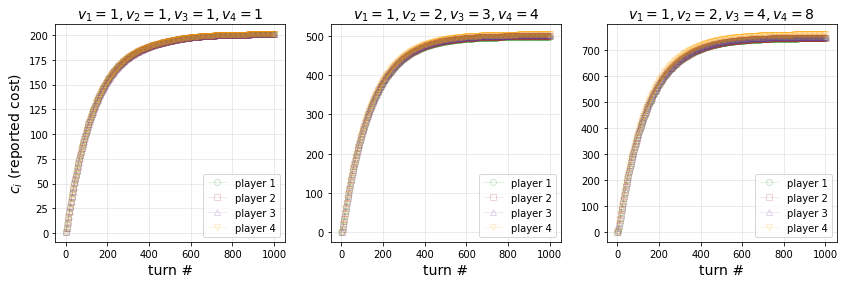

In [663]:
f, axarr = plt.subplots(ncols=3, figsize=(14,4))


axarr[0].plot(np.arange(0,turnCount+4,4), p1Bids1111, marker='o', fillstyle='none',
              linewidth=0.5, color='green', label='player 1', alpha=0.2)
axarr[0].plot(np.arange(1,turnCount+4,4), p2Bids1111, marker='s', fillstyle='none', 
              linewidth=0.5, color='brown', label='player 2', alpha=0.2)
axarr[0].plot(np.arange(2,turnCount+4,4), p3Bids1111, marker='^', fillstyle='none', 
              linewidth=0.5, color='rebeccapurple', label='player 3', alpha=0.2)
axarr[0].plot(np.arange(3,turnCount+4,4), p4Bids1111, marker='v', fillstyle='none', 
              linewidth=0.5, color='orange', label='player 4', alpha=0.2)

axarr[1].plot(np.arange(0,turnCount+4,4), p1Bids1234, marker='o', fillstyle='none',
              linewidth=0.5, color='green', label='player 1', alpha=0.2)
axarr[1].plot(np.arange(1,turnCount+4,4), p2Bids1234, marker='s', fillstyle='none', 
              linewidth=0.5, color='brown', label='player 2', alpha=0.2)
axarr[1].plot(np.arange(2,turnCount+4,4), p3Bids1234, marker='^', fillstyle='none', 
              linewidth=0.5, color='rebeccapurple', label='player 3', alpha=0.2)
axarr[1].plot(np.arange(3,turnCount+4,4), p4Bids1234, marker='v', fillstyle='none', 
              linewidth=0.5, color='orange', label='player 4', alpha=0.2)

axarr[2].plot(np.arange(0,turnCount+4,4), p1Bids1248, marker='o', fillstyle='none',
              linewidth=0.5, color='green', label='player 1', alpha=0.2)
axarr[2].plot(np.arange(1,turnCount+4,4), p2Bids1248, marker='s', fillstyle='none', 
              linewidth=0.5, color='brown', label='player 2', alpha=0.2)
axarr[2].plot(np.arange(2,turnCount+4,4), p3Bids1248, marker='^', fillstyle='none', 
              linewidth=0.5, color='rebeccapurple', label='player 3', alpha=0.2)
axarr[2].plot(np.arange(3,turnCount+4,4), p4Bids1248, marker='v', fillstyle='none', 
              linewidth=0.5, color='orange', label='player 4', alpha=0.2)


axarr[0].set_title(r'$v_1=1,v_2=1,v_3=1,v_4=1$', size=14)
axarr[1].set_title(r'$v_1=1,v_2=2,v_3=3,v_4=4$', size=14)
axarr[2].set_title(r'$v_1=1,v_2=2,v_3=4,v_4=8$', size=14)
axarr[0].set_ylabel(r'$c_i$ (reported cost)', size=14)
for ax in axarr:
    ax.set_xlabel(r'turn #', size=14)
    ax.grid(alpha=0.3)
    ax.legend()

plt.savefig('out.png', dpi=400, bbox_inches='tight', facecolor='white')
plt.show()

In [378]:
sp.solve(best)[0]

1.44403322334350

In [356]:
(c1-v1)*x1

(c1 - 1)/(c1**alpha*(c2**(-alpha) + c1**(-alpha)))

In [265]:
8/5

1.6

In [259]:
9/5

1.8

In [187]:
np.sqrt(2)

1.4142135623730951

In [237]:
u1

(c1 - v_1)/(c1**alpha*(c4**(-alpha) + c3**(-alpha) + c2**(-alpha) + c1**(-alpha)))

In [145]:
_a = 1.5
val = 10000
foc1 = sp.simplify(sp.diff(u1, c1).evalf(subs={a:_a, v1:1}))
foc1.evalf(subs=evals)

3.33333333333333e-5

In [3]:
# two play
v1 = sp.Symbol('v1', positive=True)
v2 = sp.Symbol('v2', positive=True)
c1 = sp.Symbol('c1', positive=True)
c2 = sp.Symbol('c2', positive=True)
a  = sp.Symbol('alpha', positive=True)

x1 = (1/c1)**a / ((1/c1)**a + (1/c2)**a)
u1 = sp.simplify((c1-v1)*x1)
x2 = (1/c2)**a / ((1/c1)**a + (1/c2)**a)
u2 = sp.simplify((c2-v2)*x2)
u1

c2**alpha*(c1 - v1)/(c1**alpha + c2**alpha)

In [89]:
_a = 8
foc1 = sp.simplify(sp.diff(u1, c1).evalf(subs={a:_a, v1:1}))
foc2 = sp.simplify(sp.diff(u2, c2).evalf(subs={a:_a, v2:1}))
foc1

c2**8*(c1**8 - 8.0*c1**7*(c1 - 1.0) + c2**8)/(c1**8 + c2**8)**2

In [90]:
val = 8/6
foc1.evalf(subs={c1:val,c2:val})

8.32667268468867e-17

In [50]:
5/3

1.6666666666666667

In [534]:
print_latex(disutility - disutility.evalf(subs={a:1}))

- \frac{v_{1}^{1 - \alpha}}{v_{2}^{- \alpha} + v_{1}^{- \alpha}} - \frac{v_{2}^{1 - \alpha}}{v_{2}^{- \alpha} + v_{1}^{- \alpha}} + \frac{2.0}{\frac{1}{v_{2}} + \frac{1}{v_{1}}}


In [819]:
foc2

c1*(c1 + v2)/(c1 + c2)**2

In [878]:
sol = sp.solve((sp.Eq(foc1, 0), sp.Eq(foc2, 0)), (c1, c2), dict=True)
sol

[]

In [238]:
# three play
v1 = sp.Symbol('v1', positive=True)
v2 = sp.Symbol('v2', positive=True)
v3 = sp.Symbol('v3', positive=True)
c1 = sp.Symbol('c1', positive=True)
c2 = sp.Symbol('c2', positive=True)
c3 = sp.Symbol('c3', positive=True)
a  = sp.Symbol('alpha', positive=True)

x1 = 1/(c1**a) / (1/(c1**a) + 1/(c2**a) + 1/(c3**a))
x2 = 1/(c2**a) / (1/(c1**a) + 1/(c2**a) + 1/(c3**a))
x3 = 1/(c3**a) / (1/(c1**a) + 1/(c2**a) + 1/(c3**a))
u1 = sp.simplify((c1-v1)*x1)
u2 = sp.simplify((c2-v2)*x2)
u3 = sp.simplify((c3-v3)*x3)
u1.evalf(subs={a:1})

c2*c3*(c1 - v1)/(c1*c2 + c1*c3 + c2*c3)

In [239]:
_a = 2
foc1 = sp.simplify(sp.diff(u1, c1)).evalf(subs={a:_a, v1:1})
foc2 = sp.simplify(sp.diff(u2, c2)).evalf(subs={a:_a, v2:1})
foc3 = sp.simplify(sp.diff(u3, c3)).evalf(subs={a:_a, v3:1})
# foc1 = sp.simplify(sp.diff(u1, c1)).evalf(subs={a:_a, v1:})
# foc2 = sp.simplify(sp.diff(u2, c2)).evalf(subs={a:_a,})
# foc3 = sp.simplify(sp.diff(u3, c3)).evalf(subs={a:_a,})
foc1.evalf(subs={c1:1,c2:1,c3:1})

0.333333333333333

In [240]:
val = 4
foc1.evalf(subs={c1:val,c2:val,c3:val})

0.e-126

conjecture: equal cost equilibrium for ns,alphas

symmetric => pure in the general case